In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
cars.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [7]:
cars.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [8]:
cars = cars[cars.cylinders.isin([8, 4])]

In [9]:
hp = cars.horsepower
mpg = cars.mpg
cyl = cars.cylinders

In [10]:
color = sns.color_palette('Paired')
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [11]:
sns.set_style('darkgrid')
# sns.set_style('white')

## Distplots

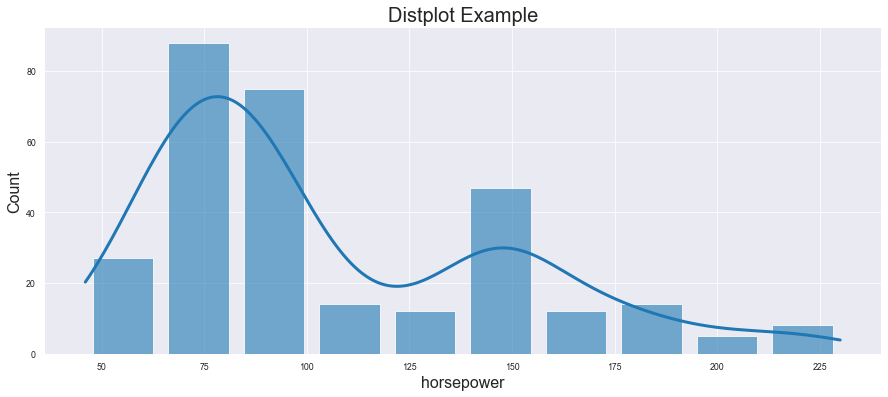

In [42]:
plt.figure(figsize=(15,6))

# sns.displot(kind="hist") == sns.histplot

p = sns.histplot(x=hp,
             
             # y=mpg,
             # cbar=True, cbar_kws=dict(shrink=.9),  # show values correlated with colors
             
             # hue=cyl,
             # legend=True,  # hue legend
             
             # stat='density','count', 'percent', # y axis
             # log_scale=True,
             
             # element='poly','step', 'bars'
             # fill=False 
             # discrete=True, #  (True, True) for x and y,  # for discrete integer data
             # multiple='stack', 'dodge', 'layer', 'fll',  # what to do with multiple values in the same bin

             alpha=0.6,
             shrink=.8,
             
             # bins=10, 
             # binwidth=10,
            
             kde=True, line_kws=dict(linewidth=3), kde_kws=dict(bw_adjust= 1),
             
             # cumulative=True,  # cumulate values as bins increase
             
            )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
plt.xlim(hp.min()-10, hp.max()+10)
p.set_title("Distplot Example")
plt.yticklabels=[]

## Kde plots

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

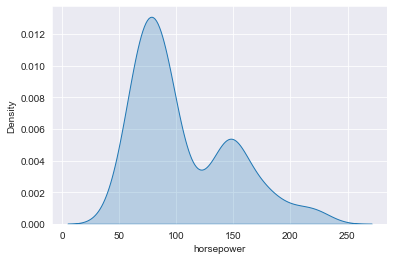

In [13]:
sns.kdeplot(x=hp  # on x axis, can be also sideway on y axis
            ,shade=True  # fill surface under the line
            ,bw_adjust=1  # increasing variance, bigger value = smoother curves
            # ,cumulative=True  # use cumulative function
           )

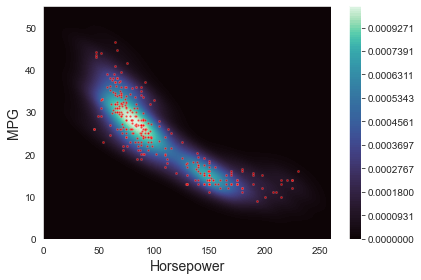

In [14]:
# combine two plots to see samples
sns.scatterplot(x=hp, y=mpg, color='red', alpha=0.7, s=5, zorder=10)

sns.kdeplot(x=hp, y=mpg,
            levels=100,
            fill=True,
            thresh=0.00, #0.05
            cbar=True,
            cmap="mako"
           )
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

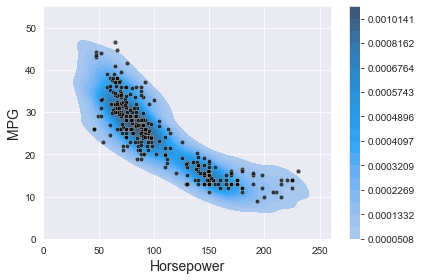

In [15]:
# combine two plots to see samples
sns.scatterplot(x=hp, y=mpg, color='black', alpha=0.7, s=20, zorder=10)

sns.kdeplot(x=hp, y=mpg,
            n_levels=20,
            shade=True,
            thresh=0.05,
            cbar=True,
            levels=100
           )
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

Text(0, 0.5, 'Miles per Gallon (MPG)')

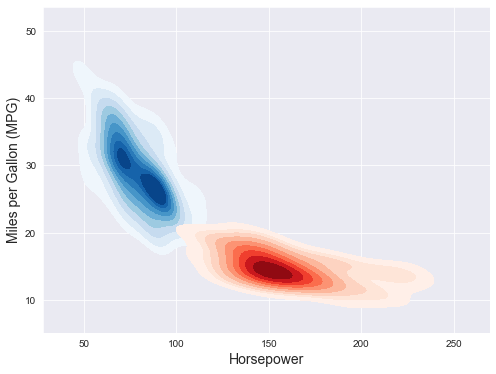

In [16]:
cars.cylinders.unique()
cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap='Blues', shade=True, thresh=0.1)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap="Reds", shade=True, thresh=0.1)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

# color
# plt.annotate("4 Cylinders", (105, 32), color=color[1], fontsize=16, fontweight='bold')
# plt.annotate("8 Cylinders", (190, 18), color=color[5], fontsize=16, fontweight='bold');

Text(0, 0.5, 'Miles per Gallon (MPG)')

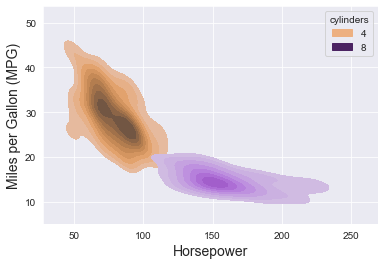

In [17]:
temp = cars[cars.cylinders.isin([8, 4])]

sns.kdeplot(x=temp.horsepower, y=temp.mpg, hue=temp.cylinders, fill=True, thresh=0.1, palette='flare'
           )
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

## Pairplots

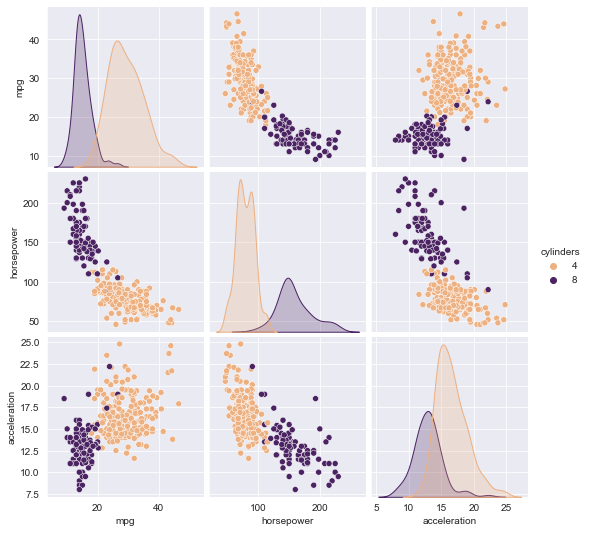

In [18]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='flare'
            );